## Import CSVs

In [ ]:
# import artists CSV as df_artists
# import pandas as pd

df_artists = pd.read_csv('/Users/jamesemcnally/Dropbox/DSBC/Spring 2026/df_artists_basic.csv')
print(f"Loaded df_artists with {len(df_artists)} rows and {len(df_artists.columns)} columns")
df_artists.head()


Loaded df_artists with 14226 rows and 30 columns


,performer_normalized,performer,first_song_year,last_song_year,first_album_year,last_album_year,years_active_on_charts,#_of_unique_years_active,total_charting_songs,total_charting_albums,...,first_charting_song_name,first_charting_song_position,first_charting_song_duration,total_charting_songs_duration_weeks,highest_charting_album_name,highest_charting_album_position,first_charting_album_name,first_charting_album_position,first_charting_album_duration,total_charting_albums_duration_weeks
0,!!! (chk chk chk),!!! (Chk Chk Chk),0,0,2007,2007,2007-2007,1,0,1,...,NaN,0,0,0,Myth Takes,195,Myth Takes,195,1,1
1,"""groove"" holmes","""Groove"" Holmes",1966,1966,0,0,1966-1966,1,2,0,...,Misty,44,11,14,NaN,0,NaN,0,0,0
2,"""little"" jimmy dickens","""Little"" Jimmy Dickens",1965,1965,0,0,1965-1965,1,1,0,...,May The Bird Of Paradise Fly Up Your Nose,15,10,10,NaN,0,NaN,0,0,0
3,"""pookie"" hudson","""Pookie"" Hudson",1963,1963,0,0,1963-1963,1,1,0,...,I Know I Know,96,1,1,NaN,0,NaN,0,0,0
4,"""weird al"" yankovic","""Weird Al"" Yankovic",1983,2014,0,0,1983-2014,8,11,0,...,Ricky,63,8,91,NaN,0,NaN,0,0,0


In [3]:
# import top 100 songs csv as df_songs and top 200 albums csv as df_albums

import pandas as pd

df_songs = pd.read_csv('/Users/jamesemcnally/Dropbox/DSBC/Spring 2026/billboard_hot100_songs_final.csv')
df_albums = pd.read_csv('/Users/jamesemcnally/Dropbox/DSBC/Spring 2026/billboard_200_albums_final.csv')

print(f"Loaded df_songs with {len(df_songs)} rows and {len(df_songs.columns)} columns")
print(f"Loaded df_albums with {len(df_albums)} rows and {len(df_albums.columns)} columns")


Loaded df_songs with 38383 rows and 8 columns
Loaded df_albums with 39129 rows and 8 columns


## EDA: Distributions

In [4]:
import pandas as pd

# === SONGS ANALYSIS ===

# Calculate counts for each threshold
thresholds = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

print("=" * 80)
print("SONGS ANALYSIS")
print("=" * 80)

song_results = []

for threshold in thresholds:
    if threshold == 1:
        # Use the #1_hit_song_count column
        count_col = df_artists['#1_hit_song_count']
    elif threshold == 10:
        count_col = df_artists['top_10_song_count']
    elif threshold == 20:
        count_col = df_artists['top_20_song_count']
    elif threshold == 50:
        count_col = df_artists['top_50_song_count']
    else:
        # Need to calculate from df_songs
        threshold_counts = df_songs[df_songs['peak_pos'] <= threshold].groupby('performer_normalized').size()
        count_col = df_artists['performer_normalized'].map(threshold_counts).fillna(0).astype(int)
    
    # Count artists with >1 hit and exactly 1 hit
    more_than_one = (count_col > 1).sum()
    exactly_one = (count_col == 1).sum()
    total_with_hits = (count_col >= 1).sum()
    
    song_results.append({
        'Threshold': f'Top {threshold}',
        '>1 Hit': more_than_one,
        'Only 1 Hit': exactly_one,
        'Total Artists': total_with_hits,
        '% One-Hit Wonders': f"{(exactly_one / total_with_hits * 100) if total_with_hits > 0 else 0:.1f}%"
    })

df_song_results = pd.DataFrame(song_results)
print("\nSONGS: Multi-Hit Artists vs One-Hit Wonders")
print(df_song_results.to_string(index=False))

# === ALBUMS ANALYSIS ===

print("\n" + "=" * 80)
print("ALBUMS ANALYSIS")
print("=" * 80)

album_results = []

for threshold in thresholds:
    if threshold == 1:
        count_col = df_artists['#1_hit_album_count']
    elif threshold == 10:
        count_col = df_artists['top_10_album_count']
    elif threshold == 20:
        count_col = df_artists['top_20_album_count']
    elif threshold == 50:
        count_col = df_artists['top_50_album_count']
    else:
        # Need to calculate from df_albums
        threshold_counts = df_albums[df_albums['peak_pos'] <= threshold].groupby('performer_normalized').size()
        count_col = df_artists['performer_normalized'].map(threshold_counts).fillna(0).astype(int)
    
    # Count artists with >1 hit and exactly 1 hit
    more_than_one = (count_col > 1).sum()
    exactly_one = (count_col == 1).sum()
    total_with_hits = (count_col >= 1).sum()
    
    album_results.append({
        'Threshold': f'Top {threshold}',
        '>1 Hit': more_than_one,
        'Only 1 Hit': exactly_one,
        'Total Artists': total_with_hits,
        '% One-Hit Wonders': f"{(exactly_one / total_with_hits * 100) if total_with_hits > 0 else 0:.1f}%"
    })

df_album_results = pd.DataFrame(album_results)
print("\nALBUMS: Multi-Hit Artists vs One-Hit Wonders")
print(df_album_results.to_string(index=False))

print("\n" + "=" * 80)


SONGS ANALYSIS

SONGS: Multi-Hit Artists vs One-Hit Wonders
Threshold  >1 Hit  Only 1 Hit  Total Artists % One-Hit Wonders
    Top 1     233         569            802             70.9%
   Top 10     953        1467           2420             60.6%
   Top 20    1386        1958           3344             58.6%
   Top 30    1773        2358           4131             57.1%
   Top 40    2107        2681           4788             56.0%
   Top 50    2457        2948           5405             54.5%
   Top 60    2813        3283           6096             53.9%
   Top 70    3185        3602           6787             53.1%
   Top 80    3523        3918           7441             52.7%
   Top 90    3877        4304           8181             52.6%
  Top 100    4203        4700           8903             52.8%

ALBUMS ANALYSIS

ALBUMS: Multi-Hit Artists vs One-Hit Wonders
Threshold  >1 Hit  Only 1 Hit  Total Artists % One-Hit Wonders
    Top 1     251         289            540             5

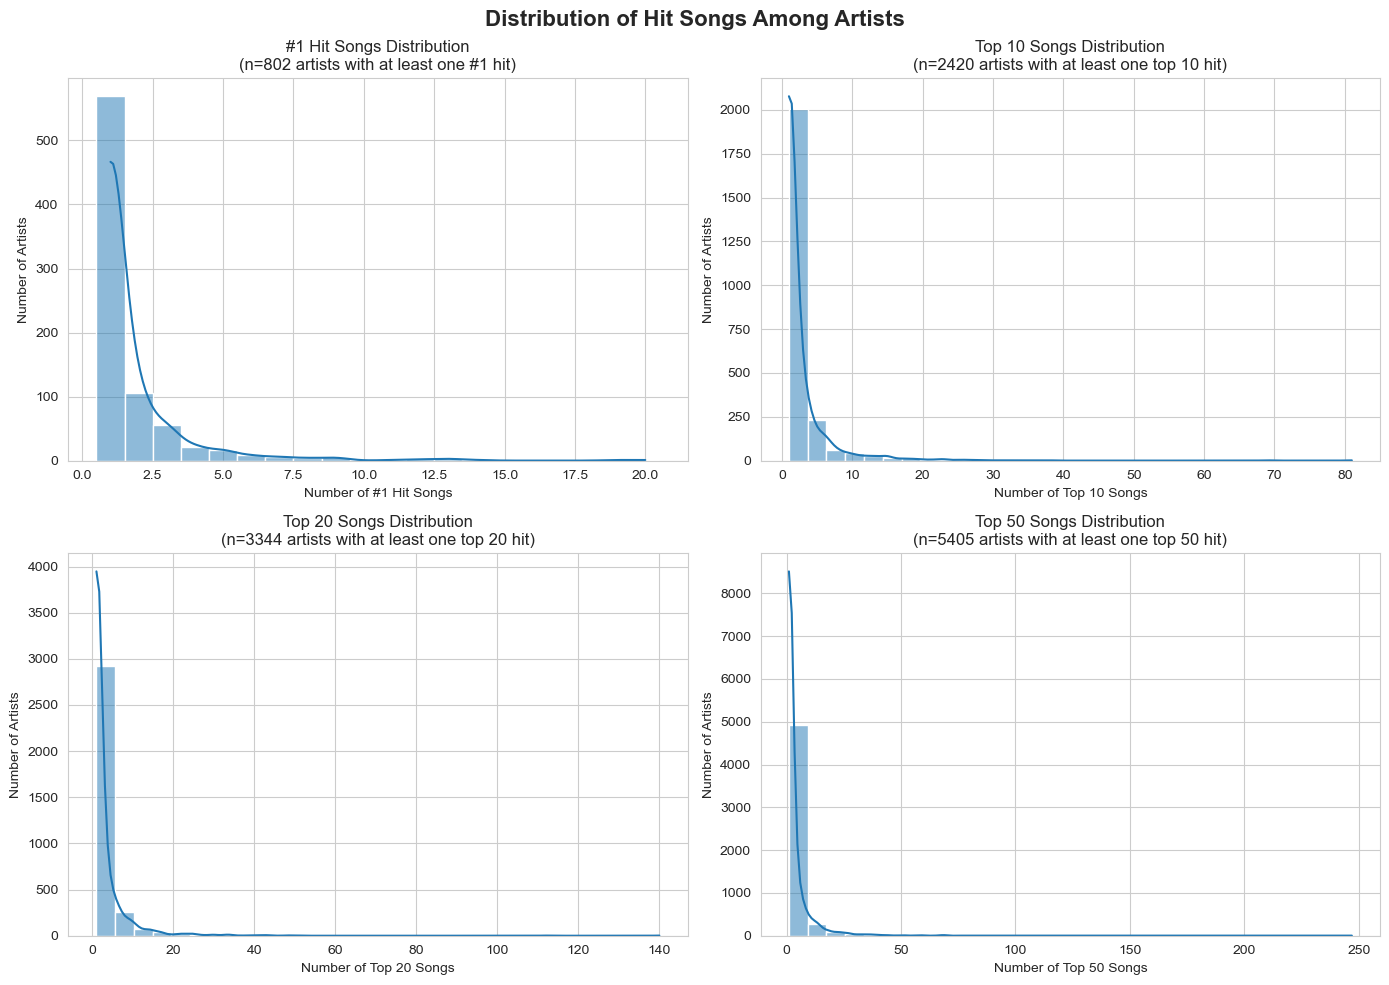


Summary Statistics:

#1 Hits: Mean=1.77, Median=1, Max=20
Top 10: Mean=2.57, Median=1, Max=81
Top 20: Mean=3.01, Median=1, Max=140
Top 50: Mean=3.76, Median=1, Max=247


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Hit Songs Among Artists', fontsize=16, fontweight='bold')

# (a) #1 Hit Songs Distribution - discrete bins
artists_with_num1 = df_artists[df_artists['#1_hit_song_count'] > 0]
max_num1 = int(artists_with_num1['#1_hit_song_count'].max())
sns.histplot(data=artists_with_num1, x='#1_hit_song_count', bins=range(1, max_num1 + 2), 
             discrete=True, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'#1 Hit Songs Distribution\n(n={len(artists_with_num1)} artists with at least one #1 hit)')
axes[0, 0].set_xlabel('Number of #1 Hit Songs')
axes[0, 0].set_ylabel('Number of Artists')

# (b) Top 10 Songs Distribution
artists_with_top10 = df_artists[df_artists['top_10_song_count'] > 0]
sns.histplot(data=artists_with_top10, x='top_10_song_count', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Top 10 Songs Distribution\n(n={len(artists_with_top10)} artists with at least one top 10 hit)')
axes[0, 1].set_xlabel('Number of Top 10 Songs')
axes[0, 1].set_ylabel('Number of Artists')

# (c) Top 20 Songs Distribution
artists_with_top20 = df_artists[df_artists['top_20_song_count'] > 0]
sns.histplot(data=artists_with_top20, x='top_20_song_count', bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'Top 20 Songs Distribution\n(n={len(artists_with_top20)} artists with at least one top 20 hit)')
axes[1, 0].set_xlabel('Number of Top 20 Songs')
axes[1, 0].set_ylabel('Number of Artists')

# (d) Top 50 Songs Distribution
artists_with_top50 = df_artists[df_artists['top_50_song_count'] > 0]
sns.histplot(data=artists_with_top50, x='top_50_song_count', bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Top 50 Songs Distribution\n(n={len(artists_with_top50)} artists with at least one top 50 hit)')
axes[1, 1].set_xlabel('Number of Top 50 Songs')
axes[1, 1].set_ylabel('Number of Artists')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("=" * 60)
print(f"\n#1 Hits: Mean={artists_with_num1['#1_hit_song_count'].mean():.2f}, Median={artists_with_num1['#1_hit_song_count'].median():.0f}, Max={artists_with_num1['#1_hit_song_count'].max()}")
print(f"Top 10: Mean={artists_with_top10['top_10_song_count'].mean():.2f}, Median={artists_with_top10['top_10_song_count'].median():.0f}, Max={artists_with_top10['top_10_song_count'].max()}")
print(f"Top 20: Mean={artists_with_top20['top_20_song_count'].mean():.2f}, Median={artists_with_top20['top_20_song_count'].median():.0f}, Max={artists_with_top20['top_20_song_count'].max()}")
print(f"Top 50: Mean={artists_with_top50['top_50_song_count'].mean():.2f}, Median={artists_with_top50['top_50_song_count'].median():.0f}, Max={artists_with_top50['top_50_song_count'].max()}")


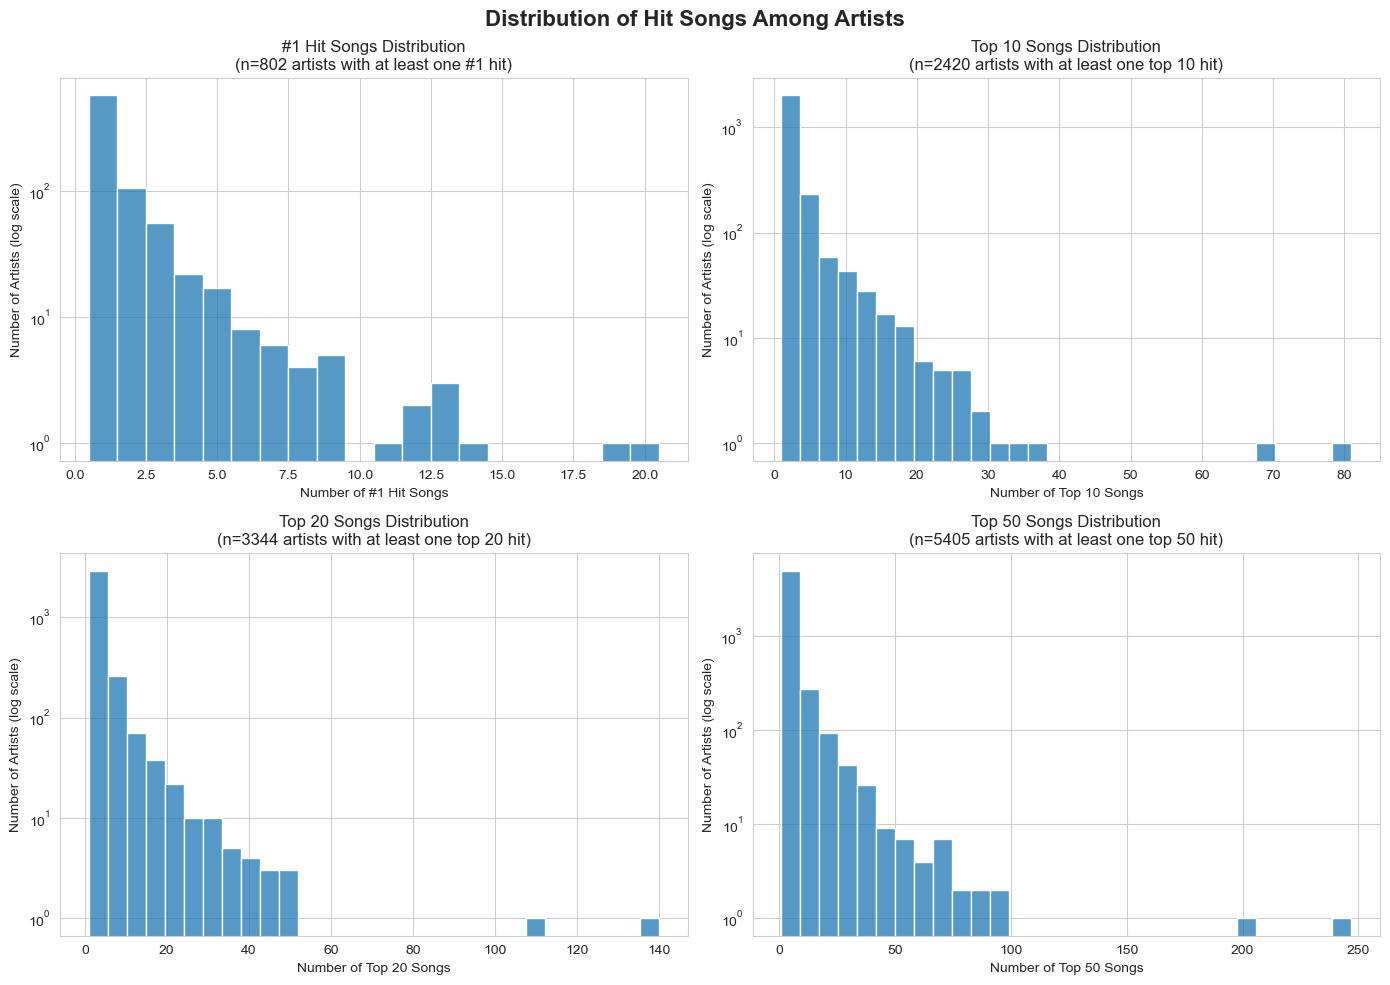


Summary Statistics:

#1 Hits: Mean=1.77, Median=1, Max=20
Top 10: Mean=2.57, Median=1, Max=81
Top 20: Mean=3.01, Median=1, Max=140
Top 50: Mean=3.76, Median=1, Max=247


In [11]:
# log scale plots

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Hit Songs Among Artists', fontsize=16, fontweight='bold')

# (a) #1 Hit Songs Distribution - discrete bins, log scale on y-axis
artists_with_num1 = df_artists[df_artists['#1_hit_song_count'] > 0]
max_num1 = int(artists_with_num1['#1_hit_song_count'].max())
sns.histplot(data=artists_with_num1, x='#1_hit_song_count', bins=range(1, max_num1 + 2), 
             discrete=True, kde=False, ax=axes[0, 0])
axes[0, 0].set_yscale('log')
axes[0, 0].set_title(f'#1 Hit Songs Distribution\n(n={len(artists_with_num1)} artists with at least one #1 hit)')
axes[0, 0].set_xlabel('Number of #1 Hit Songs')
axes[0, 0].set_ylabel('Number of Artists (log scale)')

# (b) Top 10 Songs Distribution
artists_with_top10 = df_artists[df_artists['top_10_song_count'] > 0]
sns.histplot(data=artists_with_top10, x='top_10_song_count', bins=30, kde=False, ax=axes[0, 1])
axes[0, 1].set_yscale('log')
axes[0, 1].set_title(f'Top 10 Songs Distribution\n(n={len(artists_with_top10)} artists with at least one top 10 hit)')
axes[0, 1].set_xlabel('Number of Top 10 Songs')
axes[0, 1].set_ylabel('Number of Artists (log scale)')

# (c) Top 20 Songs Distribution
artists_with_top20 = df_artists[df_artists['top_20_song_count'] > 0]
sns.histplot(data=artists_with_top20, x='top_20_song_count', bins=30, kde=False, ax=axes[1, 0])
axes[1, 0].set_yscale('log')
axes[1, 0].set_title(f'Top 20 Songs Distribution\n(n={len(artists_with_top20)} artists with at least one top 20 hit)')
axes[1, 0].set_xlabel('Number of Top 20 Songs')
axes[1, 0].set_ylabel('Number of Artists (log scale)')

# (d) Top 50 Songs Distribution
artists_with_top50 = df_artists[df_artists['top_50_song_count'] > 0]
sns.histplot(data=artists_with_top50, x='top_50_song_count', bins=30, kde=False, ax=axes[1, 1])
axes[1, 1].set_yscale('log')
axes[1, 1].set_title(f'Top 50 Songs Distribution\n(n={len(artists_with_top50)} artists with at least one top 50 hit)')
axes[1, 1].set_xlabel('Number of Top 50 Songs')
axes[1, 1].set_ylabel('Number of Artists (log scale)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("=" * 60)
print(f"\n#1 Hits: Mean={artists_with_num1['#1_hit_song_count'].mean():.2f}, Median={artists_with_num1['#1_hit_song_count'].median():.0f}, Max={artists_with_num1['#1_hit_song_count'].max()}")
print(f"Top 10: Mean={artists_with_top10['top_10_song_count'].mean():.2f}, Median={artists_with_top10['top_10_song_count'].median():.0f}, Max={artists_with_top10['top_10_song_count'].max()}")
print(f"Top 20: Mean={artists_with_top20['top_20_song_count'].mean():.2f}, Median={artists_with_top20['top_20_song_count'].median():.0f}, Max={artists_with_top20['top_20_song_count'].max()}")
print(f"Top 50: Mean={artists_with_top50['top_50_song_count'].mean():.2f}, Median={artists_with_top50['top_50_song_count'].median():.0f}, Max={artists_with_top50['top_50_song_count'].max()}")



1. SONG SUCCESS vs ALBUM SUCCESS

Artists with both songs & albums: 4654 / 14226 (32.7%)
Correlation (top 10 songs vs albums): 0.404
Correlation (total songs vs albums): 0.112

Artists with 5+ top 10 songs: 302
  - Also have 5+ top 10 albums: 136 (45.0%)

2. INITIAL CHART POSITION vs SUSTAINED CAREER

Average career metrics by first hit position:
            total_charting_songs  top_10_song_count  #_of_unique_years_active
first_tier                                                                   
Below 50                    2.67               0.19                      2.87
Top 10                      7.77               2.32                      4.85
Top 20                      5.32               0.62                      3.98
Top 50                      4.36               0.44                      3.70

Correlation (first position vs total songs): -0.169

3. TIME TO PEAK POSITION

Mean years to peak: 0.88
Median years to peak: 0
Artists who peaked immediately (year 0): 7137 (80.2%)


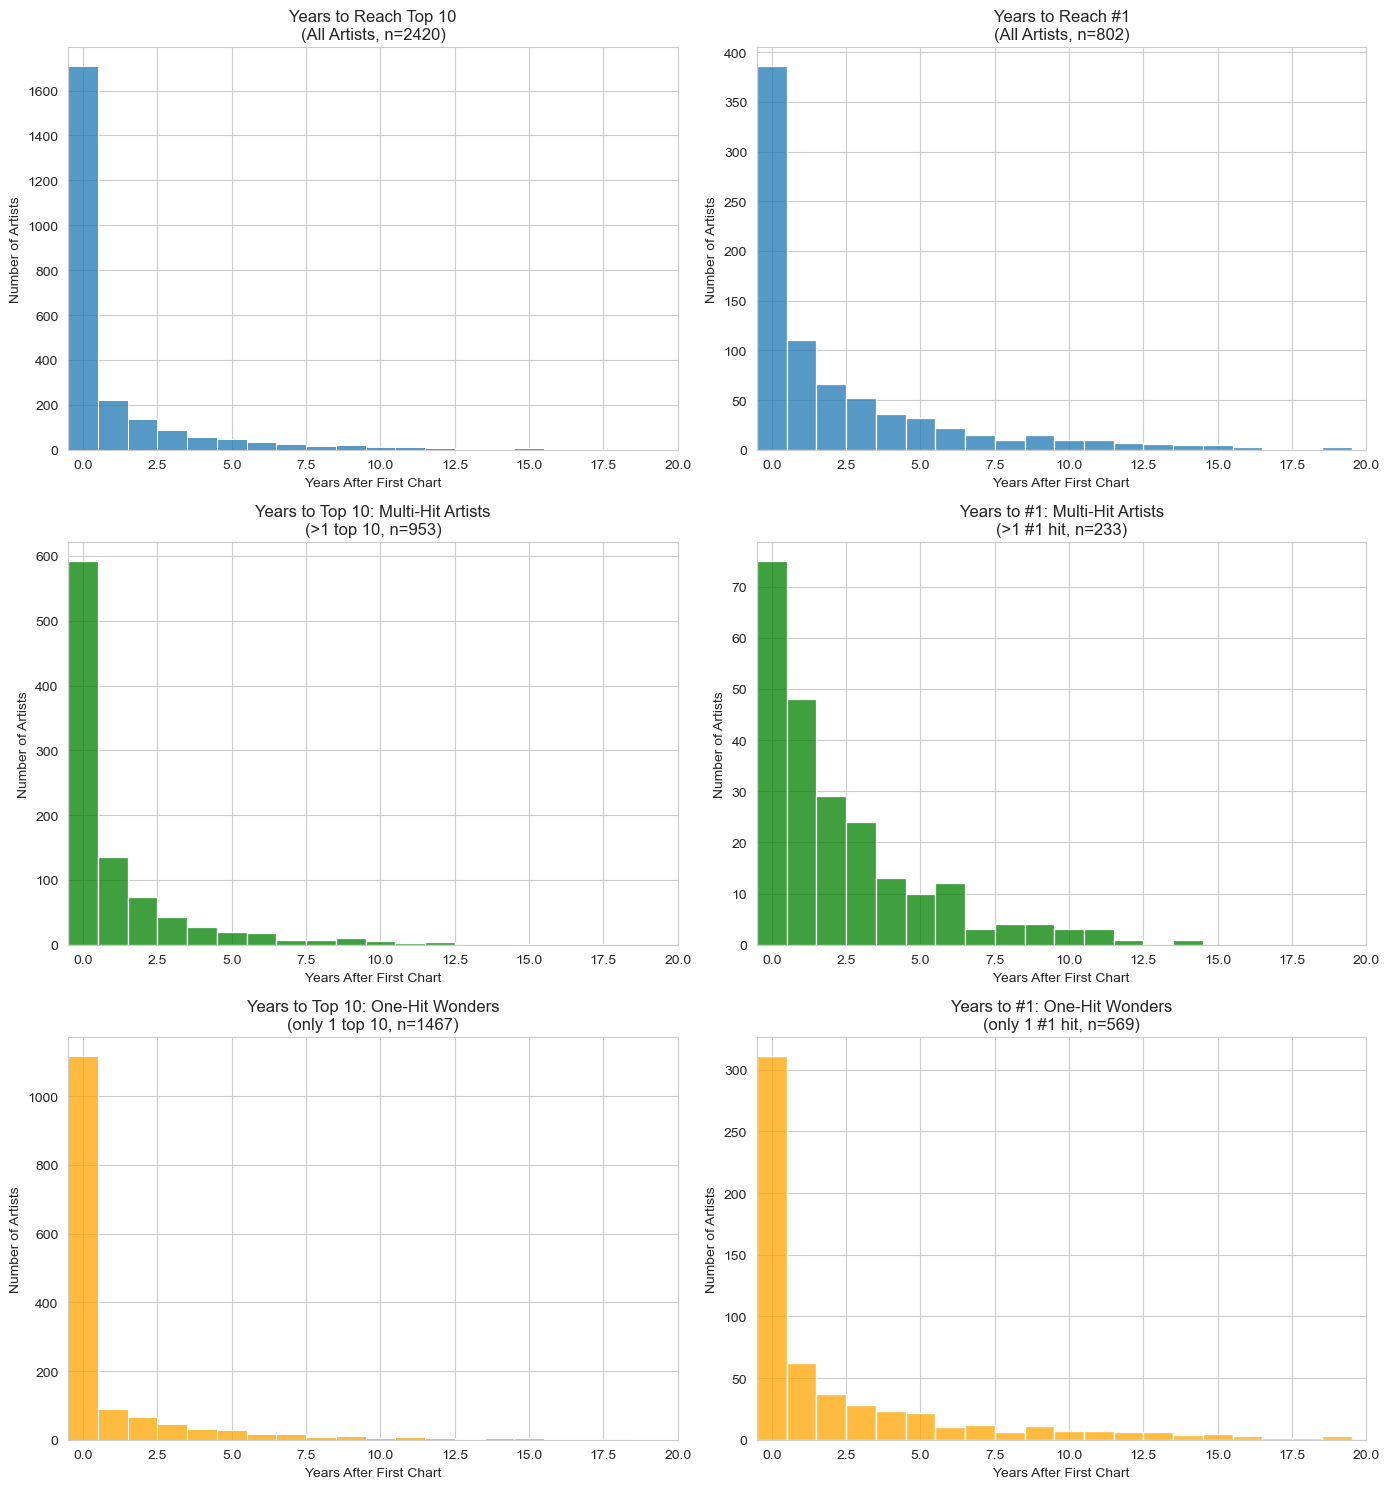

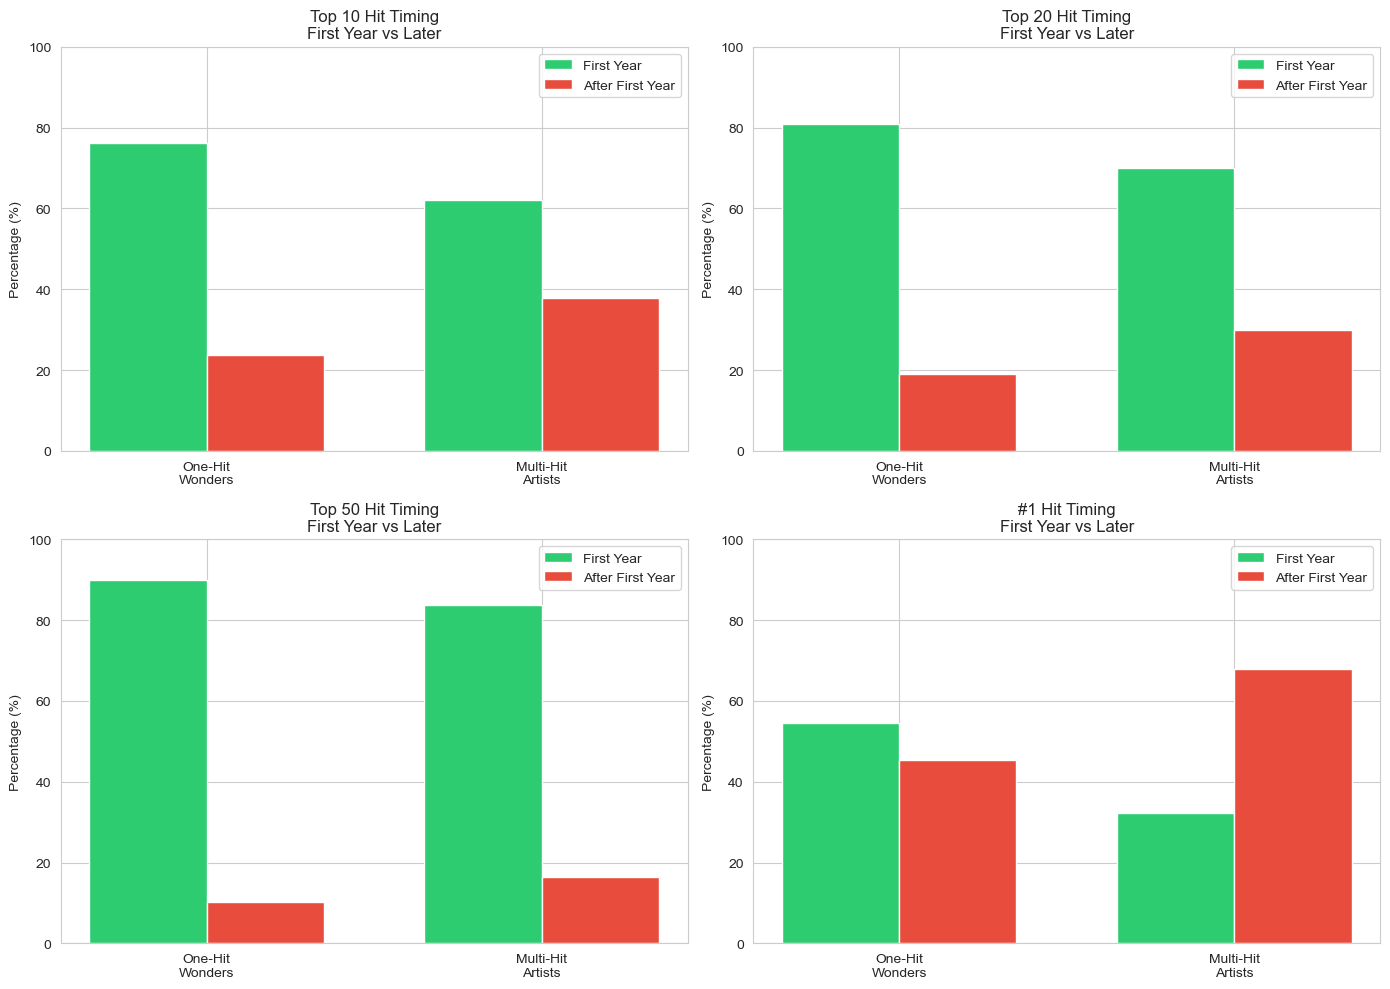

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === 1. SONG SUCCESS vs ALBUM SUCCESS ===
print("=" * 80)
print("1. SONG SUCCESS vs ALBUM SUCCESS")
print("=" * 80)

# Filter artists with both songs and albums
both = df_artists[(df_artists['total_charting_songs'] > 0) & (df_artists['total_charting_albums'] > 0)]

# Correlation
corr_top10 = both[['top_10_song_count', 'top_10_album_count']].corr().iloc[0, 1]
corr_total = both[['total_charting_songs', 'total_charting_albums']].corr().iloc[0, 1]

print(f"\nArtists with both songs & albums: {len(both)} / {len(df_artists)} ({len(both)/len(df_artists)*100:.1f}%)")
print(f"Correlation (top 10 songs vs albums): {corr_top10:.3f}")
print(f"Correlation (total songs vs albums): {corr_total:.3f}")

# Cross-tabulation
high_song = df_artists['top_10_song_count'] >= 5
high_album = df_artists['top_10_album_count'] >= 5
print(f"\nArtists with 5+ top 10 songs: {high_song.sum()}")
print(f"  - Also have 5+ top 10 albums: {(high_song & high_album).sum()} ({(high_song & high_album).sum() / high_song.sum() * 100:.1f}%)")


# === 2. INITIAL CHART POSITION vs CAREER PERFORMANCE ===
print("\n" + "=" * 80)
print("2. INITIAL CHART POSITION vs SUSTAINED CAREER")
print("=" * 80)

artists_with_songs = df_artists[df_artists['total_charting_songs'] > 0].copy()

# Group by first hit position tiers
def position_tier(pos):
    if pos <= 10: return 'Top 10'
    elif pos <= 20: return 'Top 20'
    elif pos <= 50: return 'Top 50'
    else: return 'Below 50'

artists_with_songs['first_tier'] = artists_with_songs['first_charting_song_position'].apply(position_tier)

career_by_first = artists_with_songs.groupby('first_tier').agg({
    'total_charting_songs': 'mean',
    'top_10_song_count': 'mean',
    '#_of_unique_years_active': 'mean'
}).round(2)

print("\nAverage career metrics by first hit position:")
print(career_by_first)

corr_first_career = artists_with_songs[['first_charting_song_position', 'total_charting_songs']].corr().iloc[0, 1]
print(f"\nCorrelation (first position vs total songs): {corr_first_career:.3f}")


# === 3. TIME TO PEAK (years between first chart and peak position) ===
print("\n" + "=" * 80)
print("3. TIME TO PEAK POSITION")
print("=" * 80)

# Find year of peak position for each artist
song_peaks = df_songs.loc[df_songs.groupby('performer_normalized')['peak_pos'].idxmin()][
    ['performer_normalized', 'first_charting_year']].rename(columns={'first_charting_year': 'peak_year'})

# Merge with artist first year
time_to_peak = df_artists[['performer_normalized', 'first_song_year']].merge(song_peaks, on='performer_normalized')
time_to_peak['years_to_peak'] = time_to_peak['peak_year'] - time_to_peak['first_song_year']
time_to_peak = time_to_peak[time_to_peak['first_song_year'] > 0]

print(f"\nMean years to peak: {time_to_peak['years_to_peak'].mean():.2f}")
print(f"Median years to peak: {time_to_peak['years_to_peak'].median():.0f}")
print(f"Artists who peaked immediately (year 0): {(time_to_peak['years_to_peak'] == 0).sum()} ({(time_to_peak['years_to_peak'] == 0).sum() / len(time_to_peak) * 100:.1f}%)")
print(f"Artists who peaked 5+ years later: {(time_to_peak['years_to_peak'] >= 5).sum()} ({(time_to_peak['years_to_peak'] >= 5).sum() / len(time_to_peak) * 100:.1f}%)")


# === 4. TIME TO TOP 10 HIT ===
print("\n" + "=" * 80)
print("4. TIME TO FIRST TOP 10 HIT")
print("=" * 80)

# Find first top 10 hit year
top10_songs = df_songs[df_songs['peak_pos'] <= 10]
first_top10 = top10_songs.groupby('performer_normalized')['first_charting_year'].min().reset_index()
first_top10.columns = ['performer_normalized', 'first_top10_year']

# Merge with first charting year
time_to_top10 = df_artists[['performer_normalized', 'first_song_year']].merge(first_top10, on='performer_normalized')
time_to_top10['years_to_top10'] = time_to_top10['first_top10_year'] - time_to_top10['first_song_year']
time_to_top10 = time_to_top10[time_to_top10['first_song_year'] > 0]

print(f"\nMean years to first top 10: {time_to_top10['years_to_top10'].mean():.2f}")
print(f"Median years to first top 10: {time_to_top10['years_to_top10'].median():.0f}")
print(f"Artists with immediate top 10 (year 0): {(time_to_top10['years_to_top10'] == 0).sum()} ({(time_to_top10['years_to_top10'] == 0).sum() / len(time_to_top10) * 100:.1f}%)")
print(f"Artists waiting 3+ years: {(time_to_top10['years_to_top10'] >= 3).sum()} ({(time_to_top10['years_to_top10'] >= 3).sum() / len(time_to_top10) * 100:.1f}%)")


# === 5. TIME TO TOP 20 HIT ===
print("\n" + "=" * 80)
print("5. TIME TO FIRST TOP 20 HIT")
print("=" * 80)

top20_songs = df_songs[df_songs['peak_pos'] <= 20]
first_top20 = top20_songs.groupby('performer_normalized')['first_charting_year'].min().reset_index()
first_top20.columns = ['performer_normalized', 'first_top20_year']

time_to_top20 = df_artists[['performer_normalized', 'first_song_year']].merge(first_top20, on='performer_normalized')
time_to_top20['years_to_top20'] = time_to_top20['first_top20_year'] - time_to_top20['first_song_year']
time_to_top20 = time_to_top20[time_to_top20['first_song_year'] > 0]

print(f"\nMean years to first top 20: {time_to_top20['years_to_top20'].mean():.2f}")
print(f"Median years to first top 20: {time_to_top20['years_to_top20'].median():.0f}")
print(f"Artists with immediate top 20 (year 0): {(time_to_top20['years_to_top20'] == 0).sum()} ({(time_to_top20['years_to_top20'] == 0).sum() / len(time_to_top20) * 100:.1f}%)")


# === 6. TIME TO TOP 50 HIT ===
print("\n" + "=" * 80)
print("6. TIME TO FIRST TOP 50 HIT")
print("=" * 80)

top50_songs = df_songs[df_songs['peak_pos'] <= 50]
first_top50 = top50_songs.groupby('performer_normalized')['first_charting_year'].min().reset_index()
first_top50.columns = ['performer_normalized', 'first_top50_year']

time_to_top50 = df_artists[['performer_normalized', 'first_song_year']].merge(first_top50, on='performer_normalized')
time_to_top50['years_to_top50'] = time_to_top50['first_top50_year'] - time_to_top50['first_song_year']
time_to_top50 = time_to_top50[time_to_top50['first_song_year'] > 0]

print(f"\nMean years to first top 50: {time_to_top50['years_to_top50'].mean():.2f}")
print(f"Median years to first top 50: {time_to_top50['years_to_top50'].median():.0f}")
print(f"Artists with immediate top 50 (year 0): {(time_to_top50['years_to_top50'] == 0).sum()} ({(time_to_top50['years_to_top50'] == 0).sum() / len(time_to_top50) * 100:.1f}%)")


# === 7. TIME TO #1 HIT ===
print("\n" + "=" * 80)
print("7. TIME TO FIRST #1 HIT")
print("=" * 80)

num1_songs = df_songs[df_songs['peak_pos'] == 1]
first_num1 = num1_songs.groupby('performer_normalized')['first_charting_year'].min().reset_index()
first_num1.columns = ['performer_normalized', 'first_num1_year']

time_to_num1 = df_artists[['performer_normalized', 'first_song_year']].merge(first_num1, on='performer_normalized')
time_to_num1['years_to_num1'] = time_to_num1['first_num1_year'] - time_to_num1['first_song_year']
time_to_num1 = time_to_num1[time_to_num1['first_song_year'] > 0]

print(f"\nMean years to first #1: {time_to_num1['years_to_num1'].mean():.2f}")
print(f"Median years to first #1: {time_to_num1['years_to_num1'].median():.0f}")
print(f"Artists with immediate #1 (year 0): {(time_to_num1['years_to_num1'] == 0).sum()} ({(time_to_num1['years_to_num1'] == 0).sum() / len(time_to_num1) * 100:.1f}%)")


# === PREPARE DATA ===

# Merge with artist data to get hit counts
time_to_top10_full = time_to_top10.merge(df_artists[['performer_normalized', 'top_10_song_count']], on='performer_normalized')
time_to_top20_full = time_to_top20.merge(df_artists[['performer_normalized', 'top_20_song_count']], on='performer_normalized')
time_to_top50_full = time_to_top50.merge(df_artists[['performer_normalized', 'top_50_song_count']], on='performer_normalized')
time_to_num1_full = time_to_num1.merge(df_artists[['performer_normalized', '#1_hit_song_count']], on='performer_normalized')

# Split by one-hit wonder vs multi-hit
top10_one_hit = time_to_top10_full[time_to_top10_full['top_10_song_count'] == 1]
top10_multi_hit = time_to_top10_full[time_to_top10_full['top_10_song_count'] > 1]
top20_one_hit = time_to_top20_full[time_to_top20_full['top_20_song_count'] == 1]
top20_multi_hit = time_to_top20_full[time_to_top20_full['top_20_song_count'] > 1]
top50_one_hit = time_to_top50_full[time_to_top50_full['top_50_song_count'] == 1]
top50_multi_hit = time_to_top50_full[time_to_top50_full['top_50_song_count'] > 1]
num1_one_hit = time_to_num1_full[time_to_num1_full['#1_hit_song_count'] == 1]
num1_multi_hit = time_to_num1_full[time_to_num1_full['#1_hit_song_count'] > 1]


# === 8. FIRST YEAR vs LATER SUCCESS ANALYSIS ===
print("\n" + "=" * 80)
print("8. FIRST YEAR vs LATER SUCCESS - DETAILED BREAKDOWN")
print("=" * 80)

# Function to calculate percentages
def calc_timing_stats(df, col_name):
    first_year = (df[col_name] == 0).sum()
    later = (df[col_name] > 0).sum()
    total = len(df)
    return first_year, later, total, (first_year/total*100) if total > 0 else 0, (later/total*100) if total > 0 else 0

# TOP 10
print("\n--- TOP 10 HITS ---")
t10_f, t10_l, t10_t, t10_fp, t10_lp = calc_timing_stats(time_to_top10, 'years_to_top10')
print(f"All Artists: First year: {t10_f} ({t10_fp:.1f}%), Later: {t10_l} ({t10_lp:.1f}%)")

t10_ohw_f, t10_ohw_l, t10_ohw_t, t10_ohw_fp, t10_ohw_lp = calc_timing_stats(top10_one_hit, 'years_to_top10')
print(f"One-Hit Wonders: First year: {t10_ohw_f} ({t10_ohw_fp:.1f}%), Later: {t10_ohw_l} ({t10_ohw_lp:.1f}%)")

t10_multi_f, t10_multi_l, t10_multi_t, t10_multi_fp, t10_multi_lp = calc_timing_stats(top10_multi_hit, 'years_to_top10')
print(f"Multi-Hit Artists: First year: {t10_multi_f} ({t10_multi_fp:.1f}%), Later: {t10_multi_l} ({t10_multi_lp:.1f}%)")

# TOP 20
print("\n--- TOP 20 HITS ---")
t20_f, t20_l, t20_t, t20_fp, t20_lp = calc_timing_stats(time_to_top20, 'years_to_top20')
print(f"All Artists: First year: {t20_f} ({t20_fp:.1f}%), Later: {t20_l} ({t20_lp:.1f}%)")

t20_ohw_f, t20_ohw_l, t20_ohw_t, t20_ohw_fp, t20_ohw_lp = calc_timing_stats(top20_one_hit, 'years_to_top20')
print(f"One-Hit Wonders: First year: {t20_ohw_f} ({t20_ohw_fp:.1f}%), Later: {t20_ohw_l} ({t20_ohw_lp:.1f}%)")

t20_multi_f, t20_multi_l, t20_multi_t, t20_multi_fp, t20_multi_lp = calc_timing_stats(top20_multi_hit, 'years_to_top20')
print(f"Multi-Hit Artists: First year: {t20_multi_f} ({t20_multi_fp:.1f}%), Later: {t20_multi_l} ({t20_multi_lp:.1f}%)")

# TOP 50
print("\n--- TOP 50 HITS ---")
t50_f, t50_l, t50_t, t50_fp, t50_lp = calc_timing_stats(time_to_top50, 'years_to_top50')
print(f"All Artists: First year: {t50_f} ({t50_fp:.1f}%), Later: {t50_l} ({t50_lp:.1f}%)")

t50_ohw_f, t50_ohw_l, t50_ohw_t, t50_ohw_fp, t50_ohw_lp = calc_timing_stats(top50_one_hit, 'years_to_top50')
print(f"One-Hit Wonders: First year: {t50_ohw_f} ({t50_ohw_fp:.1f}%), Later: {t50_ohw_l} ({t50_ohw_lp:.1f}%)")

t50_multi_f, t50_multi_l, t50_multi_t, t50_multi_fp, t50_multi_lp = calc_timing_stats(top50_multi_hit, 'years_to_top50')
print(f"Multi-Hit Artists: First year: {t50_multi_f} ({t50_multi_fp:.1f}%), Later: {t50_multi_l} ({t50_multi_lp:.1f}%)")

# #1
print("\n--- #1 HITS ---")
n1_f, n1_l, n1_t, n1_fp, n1_lp = calc_timing_stats(time_to_num1, 'years_to_num1')
print(f"All Artists: First year: {n1_f} ({n1_fp:.1f}%), Later: {n1_l} ({n1_lp:.1f}%)")

n1_ohw_f, n1_ohw_l, n1_ohw_t, n1_ohw_fp, n1_ohw_lp = calc_timing_stats(num1_one_hit, 'years_to_num1')
print(f"One-Hit Wonders: First year: {n1_ohw_f} ({n1_ohw_fp:.1f}%), Later: {n1_ohw_l} ({n1_ohw_lp:.1f}%)")

n1_multi_f, n1_multi_l, n1_multi_t, n1_multi_fp, n1_multi_lp = calc_timing_stats(num1_multi_hit, 'years_to_num1')
print(f"Multi-Hit Artists: First year: {n1_multi_f} ({n1_multi_fp:.1f}%), Later: {n1_multi_l} ({n1_multi_lp:.1f}%)")


# === HISTOGRAM VISUALIZATIONS ===

# Create 3x2 grid for histograms
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Row 1: Overall distributions
max_years_top10 = int(time_to_top10['years_to_top10'].max())
sns.histplot(data=time_to_top10, x='years_to_top10', bins=range(0, min(max_years_top10 + 2, 21)), 
             discrete=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Years to Reach Top 10\n(All Artists, n={len(time_to_top10)})')
axes[0, 0].set_xlabel('Years After First Chart')
axes[0, 0].set_ylabel('Number of Artists')
axes[0, 0].set_xlim(-0.5, 20)

max_years_num1 = int(time_to_num1['years_to_num1'].max())
sns.histplot(data=time_to_num1, x='years_to_num1', bins=range(0, min(max_years_num1 + 2, 21)), 
             discrete=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Years to Reach #1\n(All Artists, n={len(time_to_num1)})')
axes[0, 1].set_xlabel('Years After First Chart')
axes[0, 1].set_ylabel('Number of Artists')
axes[0, 1].set_xlim(-0.5, 20)

# Row 2: Multi-hit artists
sns.histplot(data=top10_multi_hit, x='years_to_top10', bins=range(0, min(max_years_top10 + 2, 21)), 
             discrete=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title(f'Years to Top 10: Multi-Hit Artists\n(>1 top 10, n={len(top10_multi_hit)})')
axes[1, 0].set_xlabel('Years After First Chart')
axes[1, 0].set_ylabel('Number of Artists')
axes[1, 0].set_xlim(-0.5, 20)

sns.histplot(data=num1_multi_hit, x='years_to_num1', bins=range(0, min(max_years_num1 + 2, 21)), 
             discrete=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title(f'Years to #1: Multi-Hit Artists\n(>1 #1 hit, n={len(num1_multi_hit)})')
axes[1, 1].set_xlabel('Years After First Chart')
axes[1, 1].set_ylabel('Number of Artists')
axes[1, 1].set_xlim(-0.5, 20)

# Row 3: One-hit wonders
sns.histplot(data=top10_one_hit, x='years_to_top10', bins=range(0, min(max_years_top10 + 2, 21)), 
             discrete=True, ax=axes[2, 0], color='orange')
axes[2, 0].set_title(f'Years to Top 10: One-Hit Wonders\n(only 1 top 10, n={len(top10_one_hit)})')
axes[2, 0].set_xlabel('Years After First Chart')
axes[2, 0].set_ylabel('Number of Artists')
axes[2, 0].set_xlim(-0.5, 20)

sns.histplot(data=num1_one_hit, x='years_to_num1', bins=range(0, min(max_years_num1 + 2, 21)), 
             discrete=True, ax=axes[2, 1], color='orange')
axes[2, 1].set_title(f'Years to #1: One-Hit Wonders\n(only 1 #1 hit, n={len(num1_one_hit)})')
axes[2, 1].set_xlabel('Years After First Chart')
axes[2, 1].set_ylabel('Number of Artists')
axes[2, 1].set_xlim(-0.5, 20)

plt.tight_layout()
plt.show()


# === BAR CHART VISUALIZATIONS ===

# Create bar charts comparing one-hit wonders vs multi-hit artists
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Data for bar charts
categories = ['One-Hit\nWonders', 'Multi-Hit\nArtists']

# Top 10
ax = axes[0, 0]
first_year_vals = [t10_ohw_fp, t10_multi_fp]
later_vals = [t10_ohw_lp, t10_multi_lp]
x = np.arange(len(categories))
width = 0.35
ax.bar(x - width/2, first_year_vals, width, label='First Year', color='#2ecc71')
ax.bar(x + width/2, later_vals, width, label='After First Year', color='#e74c3c')
ax.set_ylabel('Percentage (%)')
ax.set_title('Top 10 Hit Timing\nFirst Year vs Later')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 100)

# Top 20
ax = axes[0, 1]
first_year_vals = [t20_ohw_fp, t20_multi_fp]
later_vals = [t20_ohw_lp, t20_multi_lp]
ax.bar(x - width/2, first_year_vals, width, label='First Year', color='#2ecc71')
ax.bar(x + width/2, later_vals, width, label='After First Year', color='#e74c3c')
ax.set_ylabel('Percentage (%)')
ax.set_title('Top 20 Hit Timing\nFirst Year vs Later')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 100)

# Top 50
ax = axes[1, 0]
first_year_vals = [t50_ohw_fp, t50_multi_fp]
later_vals = [t50_ohw_lp, t50_multi_lp]
ax.bar(x - width/2, first_year_vals, width, label='First Year', color='#2ecc71')
ax.bar(x + width/2, later_vals, width, label='After First Year', color='#e74c3c')
ax.set_ylabel('Percentage (%)')
ax.set_title('Top 50 Hit Timing\nFirst Year vs Later')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 100)

# #1
ax = axes[1, 1]
first_year_vals = [n1_ohw_fp, n1_multi_fp]
later_vals = [n1_ohw_lp, n1_multi_lp]
ax.bar(x - width/2, first_year_vals, width, label='First Year', color='#2ecc71')
ax.bar(x + width/2, later_vals, width, label='After First Year', color='#e74c3c')
ax.set_ylabel('Percentage (%)')
ax.set_title('#1 Hit Timing\nFirst Year vs Later')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
